# Spectrum

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../src/")

import partition_energy

In [6]:
states = partition_energy.read_splits("states_energies", (1000, 28), "1000ps_100fs")

In [12]:
exciton_excitations = np.array([states[:, i] - states[:, 0] for i in range(1, 28)]).T

<BarContainer object of 200 artists>

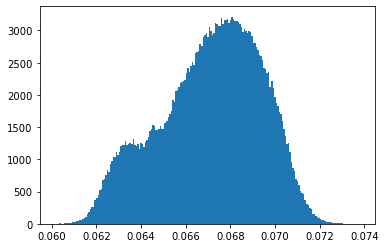

In [50]:
freq, bins = np.histogram(exciton_excitations, bins=200)

plt.bar(bins[:-1], freq, width=np.mean(np.diff(bins)))

<BarContainer object of 200 artists>

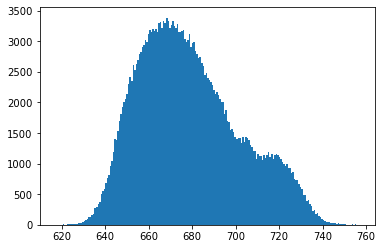

In [59]:
def hartree_to_nm(x):
    c = 299792458 #speed of light, m/s
    h = 6.626e-34 #Planck constant
    J_per_Eh = 4.35974e-18 # J/Eh
    
    wavelength = (h*c) / (x * J_per_Eh)
    
    return 1e9 * wavelength # m to nm conversion

def hartree_to_pcm(x):
    c = 299792458 #speed of light, m/s
    h = 6.626e-34 #Planck constant
    J_per_Eh = 4.35974e-18 # J/Eh
    
    wavenumber = (x * J_per_Eh) / (h*c)
    
    return 1e-2 * wavenumber # m-1 to cm-1 conversion

exciton_excitations_nm = hartree_to_nm(exciton_excitations)

freq, bins = np.histogram(exciton_excitations_nm, bins=200)

plt.bar(bins[:-1], freq, np.mean(np.diff(bins)))

<BarContainer object of 200 artists>

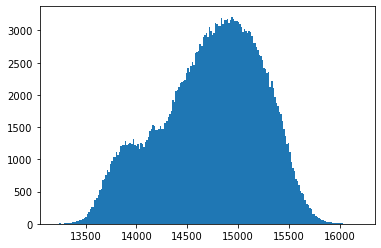

In [60]:
exciton_excitations_pcm = hartree_to_pcm(exciton_excitations)

freq, bins = np.histogram(exciton_excitations_pcm, bins=200)

plt.bar(bins[:-1], freq, np.mean(np.diff(bins)))